# importing required libraries


In [2]:
import pandas as pd #for data manipulation
import numpy as np #for data analysis
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#visualization of frequent words
from wordcloud import WordCloud
#natural language processing (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re #cleaning text
#ML tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer# vectorization
from sklearn.naive_bayes import MultinomialNB#naive bayes for text classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# loading Dataset ,displaying head lines (first 5)

In [3]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape #dataset structure 2 columns 50000 lines


(50000, 2)

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZVI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ZVI\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ZVI\AppData\Roaming\nltk_data...


True

In [6]:
from nltk.corpus import stopwords
print(stopwords.words('english')[:10])#English stopwords 


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


# text cleaning 

In [7]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#lemmatizer creation ( grouping many forms of a word in one word )
#used in advanced research znd chatboxes
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#function to clean text
def clean_text(text):
    #removing html tags
    text = re.sub(r'<.*?>', '', text)
    #only letters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    #convert to lowercase
    text = text.lower()
    #Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    #words back into a single string
    return ' '.join(words)

#clean the review column
df['clean_review'] = df['review'].apply(clean_text)

#example
df[['review', 'clean_review']].head()


,review,clean_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function to clean text
def clean_text(text):
    #removing html tags
    text = re.sub(r'<.*?>', '', text)
    #only letters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    #convert to lowercase
    text = text.lower()
    #Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    #words back into a single string
    return ' '.join(words)

#clean the review column
df['clean_review'] = df['review'].apply(clean_text)

#example
df[['review', 'clean_review']].head(10)


,review,clean_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",probably time favorite movie story selflessnes...
6,I sure would like to see a resurrection of a u...,sure would like see resurrection dated seahunt...
7,"This show was an amazing, fresh & innovative i...",show amazing fresh innovative idea first aired...
8,Encouraged by the positive comments about this...,encouraged positive comment film looking forwa...
9,If you like original gut wrenching laughter yo...,like original gut wrenching laughter like movi...


# vectorization

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#vectorization TF IDF
vectorizer = TfidfVectorizer(max_features=5000)  #5000 most frequent words
X = vectorizer.fit_transform(df['clean_review']).toarray()#transform clean_review to an array

#target variable (pos/neg)
y = df['sentiment']

#dividing datasets into 2 subsets train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (40000, 5000)
Testing shape: (10000, 5000)


# training the model ,prediction and performance evaluation

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#creation and training model 
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

#prediction
y_pred = nb_model.predict(X_test)

#performance evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8554

 Confusion Matrix:
 [[4206  755]
 [ 691 4348]]

 Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.85      0.85      4961
    positive       0.85      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## ANN - Alaa's part:

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

In [13]:
ann_model = Sequential([
    Dense(256, activation="leaky_relu", input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation="leaky_relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

C:\Users\ZVI\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
ann_model.compile(
    optimizer=Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

**training:**

In [15]:
history = ann_model.fit(
    X_train,
    y_train_enc,
    epochs=12,
    batch_size=256,
    validation_split=0.1,
    verbose=1
)

Epoch 1/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7199 - loss: 0.6645 - val_accuracy: 0.8550 - val_loss: 0.5827
Epoch 2/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8545 - loss: 0.4548 - val_accuracy: 0.8815 - val_loss: 0.3373
Epoch 3/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8838 - loss: 0.3040 - val_accuracy: 0.8903 - val_loss: 0.2756
Epoch 4/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8969 - loss: 0.2585 - val_accuracy: 0.8917 - val_loss: 0.2618
Epoch 5/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9064 - loss: 0.2387 - val_accuracy: 0.8907 - val_loss: 0.2578
Epoch 6/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9124 - loss: 0.2239 - val_accuracy: 0.8898 - val_loss: 0.2589
Epoch 7/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9157 - loss: 0.2150 - val_accuracy: 0.8880 - val_loss: 0.2612
Epoch 8/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9197 - loss: 0.2070 - val_accu

**evaluation**

In [16]:
y_prob = ann_model.predict(X_test).ravel()
y_pred_ann = (y_prob > 0.5).astype(int)

print("\n=== ANN Results ===")
print("Accuracy:", accuracy_score(y_test_enc, y_pred_ann))
print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_pred_ann))
print("Classification Report:\n", classification_report(y_test_enc, y_pred_ann, digits=3))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

=== ANN Results ===
Accuracy: 0.8868
Confusion Matrix:
 [[4393  568]
 [ 564 4475]]
Classification Report:
               precision    recall  f1-score   support

           0      0.886     0.886     0.886      4961
           1      0.887     0.888     0.888      5039

    accuracy                          0.887     10000
   macro avg      0.887     0.887     0.887     10000
weighted avg      0.887     0.887     0.887     10000



## SVM MHD'S PART

In [21]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# -----------------------------
# Train SVM model
# -----------------------------
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# -----------------------------
# Prediction
# -----------------------------
y_pred_svm = svm_model.predict(X_test)

In [23]:
# -----------------------------
# Evaluation
# -----------------------------
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8818

Confusion Matrix:
 [[4316  645]
 [ 537 4502]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



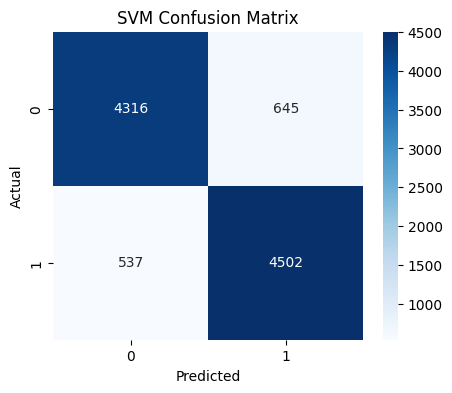

In [24]:
# -----------------------------
# Confusion Matrix Heatmap
# -----------------------------
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
# -----------------------------
# Top Positive & Negative Words
# -----------------------------
feature_names = np.array(vectorizer.get_feature_names_out())
coef = svm_model.coef_[0]

top_positive_words = feature_names[np.argsort(coef)][-20:]
top_negative_words = feature_names[np.argsort(coef)][:20]

print("\nTop Positive Words:")
print(top_positive_words)

print("\nTop Negative Words:")
print(top_negative_words)



Top Positive Words:
['favorite' 'entertaining' 'loved' 'subtle' 'surprisingly' 'beautifully'
 'fantastic' 'funniest' 'wonderfully' 'wonderful' 'hilarious'
 'brilliantly' 'enjoyable' 'brilliant' 'amazing' 'perfectly' 'perfect'
 'great' 'excellent' 'refreshing']

Top Negative Words:
['worst' 'waste' 'awful' 'boring' 'disappointment' 'forgettable' 'mst'
 'fails' 'disappointing' 'poorly' 'laughable' 'poor' 'lousy' 'dull' 'bad'
 'uninteresting' 'terrible' 'mediocre' 'miscast' 'horrible']


# Error Analysis

In [28]:
wrong_idx = (y_pred_svm != y_test)
X_wrong = df['clean_review'][wrong_idx][:5]

for review in X_wrong:
    print("Misclassified Review:\n", review)
    print("-"*80)


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).